# Regression problem

# Import All libaray

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
import scipy as sp

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
# Set Display of Monitor
pd.set_option('Display.max_rows',500)
pd.set_option('Display.max_columns',500)
pd.set_option('Display.width',1000)

In [3]:
data = pd.read_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\Data\\Laptop_data.csv')

In [4]:
data.head(2)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


# Dataset Exploring and Understading

In [5]:
data.head(2)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [6]:
# Shape of the dataset
print('Total Rows of the dataset:-',data.shape[0])
print('Total Columns of the dataset:-',data.shape[1])

Total Rows of the dataset:- 1303
Total Columns of the dataset:- 12


In [7]:
# all columns of the dataset
data.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'], dtype='object')

In [8]:
# All categorical columns of the dataset
data.columns[data.dtypes == object]

Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight'], dtype='object')

In [9]:
# All continuous columns of the dataset
data.columns[data.dtypes != object]

Index(['Unnamed: 0', 'Inches', 'Price'], dtype='object')

In [10]:
# All dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


# Data preprocessing 

In [11]:
# Check all Duplicate rows
data.duplicated().sum()

0

In [12]:
# Check all null values
data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [13]:
# Drop Unnecessary column
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [14]:
data.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [15]:
# Data Extract
data['Ram'] = data['Ram'].str.replace('GB','')
data['Weight'] = data['Weight'].str.replace('kg','')

In [16]:
data.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


In [17]:
# Change datatype 
data['Ram'] = data['Ram'].astype('int32')
data['Weight'] = data['Weight'].astype('float32')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


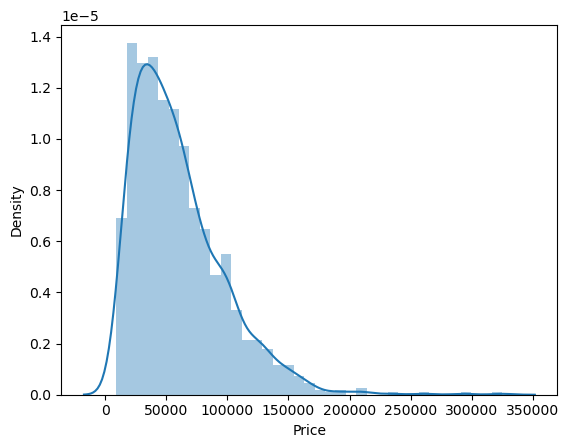

In [19]:
sns.distplot(data['Price'])
plt.show()

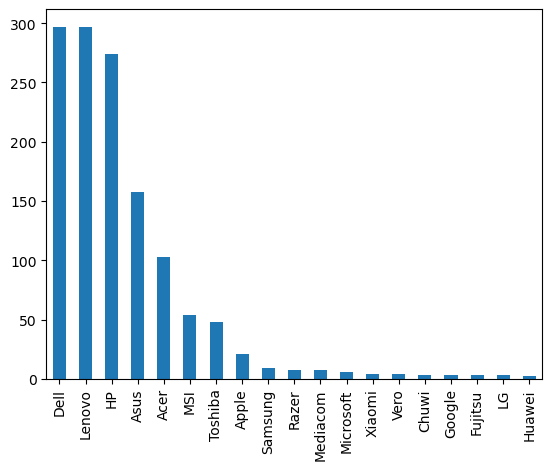

In [20]:
data['Company'].value_counts().plot(kind='bar')
plt.show()

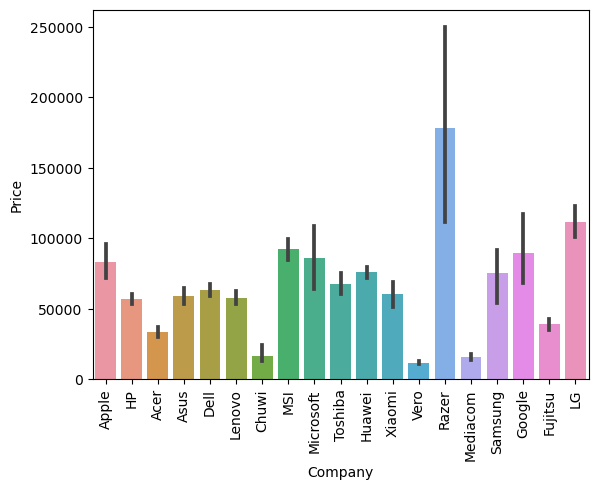

In [21]:
sns.barplot(x=data['Company'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

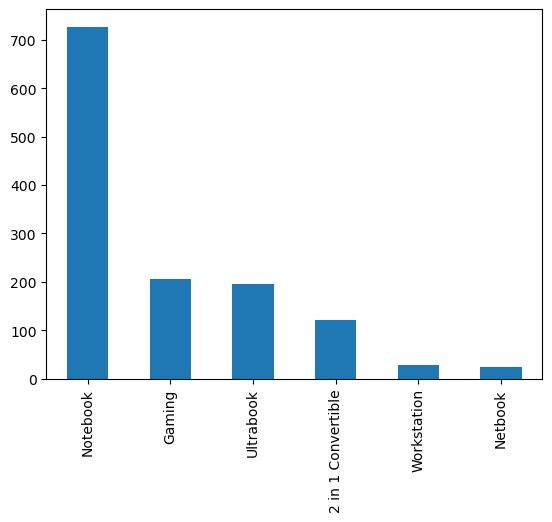

In [22]:
data['TypeName'].value_counts().plot(kind='bar')
plt.show()

# observation
## 1. Notebook type laptop has sold more comparedto others 
## 2.Dell's loptop has been sold the most
## 3. Company effect on price
##  4. Type effect on price
## 5.Inches is not affecting the price that much


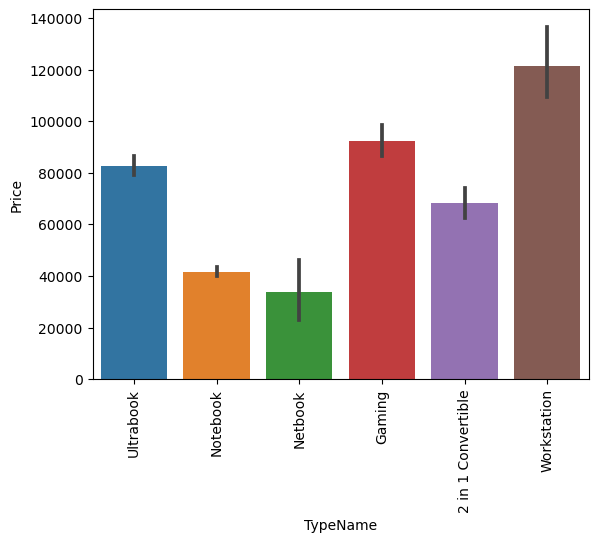

In [23]:
sns.barplot(x=data['TypeName'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

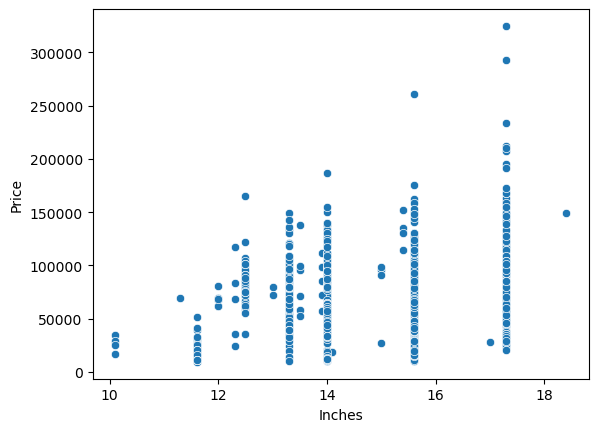

In [24]:
sns.scatterplot(x=data['Inches'],y=data['Price'])
plt.show()

In [25]:
data['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [26]:
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
data.sample(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
287,Asus,Ultrabook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.70,52054.5600,0
253,Lenovo,2 in 1 Convertible,13.9,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.37,98514.7200,1
505,Lenovo,Notebook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.44,50562.7200,0
913,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.04,54291.7872,0


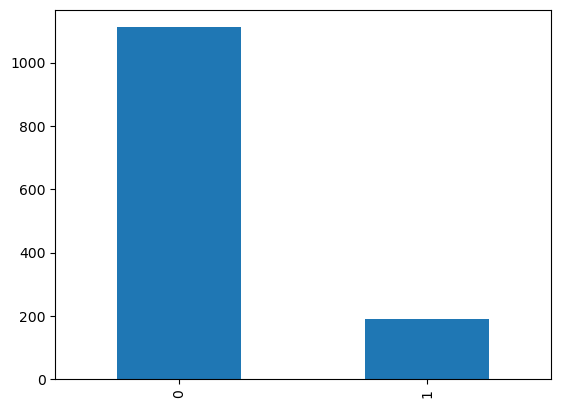

In [27]:
data['Touchscreen'].value_counts().plot(kind='bar')
plt.show()

In [28]:
data['Touchscreen'].value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

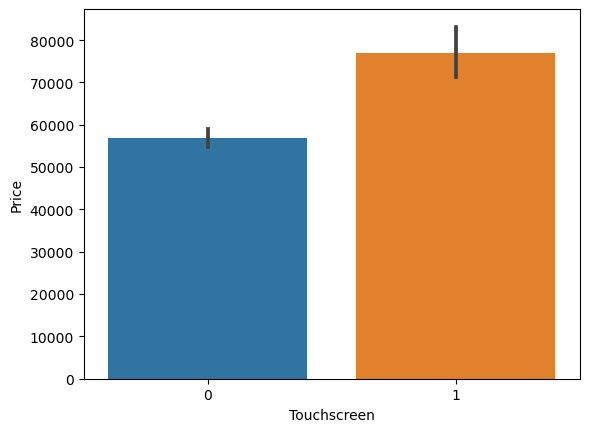

In [29]:
sns.barplot(x=data['Touchscreen'],y=data['Price'])
plt.show()

In [30]:
data['IPS'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
data.sample(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
376,Lenovo,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Quad Core N3450 1.1GHz,4,128GB SSD,Intel HD Graphics 500,Windows 10,1.59,29463.8400,0,1
230,Asus,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,2.37,21258.1872,0,0
1165,Dell,Gaming,15.6,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,79813.4400,0,0
513,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.20,64961.1072,0,0


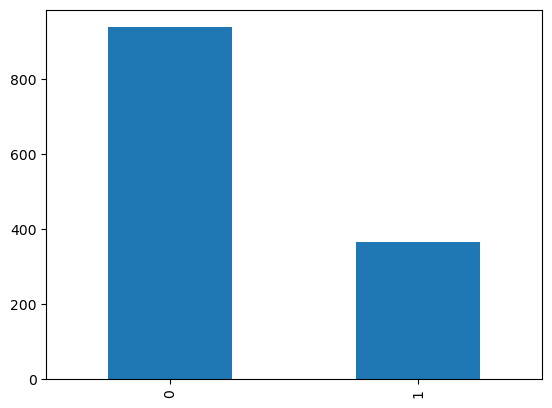

In [31]:
data['IPS'].value_counts().plot(kind='bar')
plt.show()

In [32]:
data['IPS'].value_counts()

0    938
1    365
Name: IPS, dtype: int64

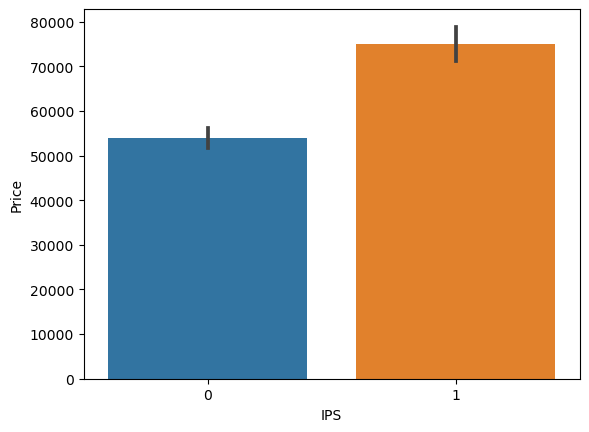

In [33]:
sns.barplot(x=data['IPS'],y=data['Price'])
plt.show()

In [34]:
new = data['ScreenResolution'].str.split('x',n=1,expand=True)
data['X_res'] = new[0]
data['Y_res'] = new[1]

In [35]:
data.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900


In [36]:
data['X_res'] = data['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [37]:
data.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900


In [38]:
data['X_res'] = data['X_res'].astype('int32')
data['Y_res'] = data['Y_res'].astype('int32')

In [39]:
data.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [40]:
data['PPI'] = (((data['X_res']**2) + (data['Y_res']**2)) **0.5/data['Inches']).astype('float32')
data.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983002
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940


In [41]:
data.drop(columns=['ScreenResolution','X_res','Y_res','Inches'],inplace=True)

In [42]:
data['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz               190
Intel Core i7 7700HQ 2.8GHz              146
Intel Core i7 7500U 2.7GHz               134
Intel Core i7 8550U 1.8GHz                73
Intel Core i5 8250U 1.6GHz                72
Intel Core i5 6200U 2.3GHz                68
Intel Core i3 6006U 2GHz                  64
Intel Core i7 6500U 2.5GHz                49
Intel Core i7 6700HQ 2.6GHz               43
Intel Core i3 7100U 2.4GHz                37
Intel Core i5 7300HQ 2.5GHz               33
Intel Celeron Dual Core N3350 1.1GHz      30
Intel Celeron Dual Core N3060 1.6GHz      28
Intel Core i7 6600U 2.6GHz                18
Intel Core i3 6006U 2.0GHz                16
Intel Pentium Quad Core N4200 1.1GHz      14
Intel Core i5 7300U 2.6GHz                14
Intel Core i7 7600U 2.8GHz                13
Intel Pentium Quad Core N3710 1.6GHz      11
AMD A9-Series 9420 3GHz                   11
Intel Core i5 6300U 2.4GHz                11
Intel Celeron Dual Core N3050 1.6GHz      11
Intel Core

In [43]:
data['Cpu_name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [44]:
data.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.212006,Intel Core i5


In [45]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [46]:
data['Cpu_brand'] = data['Cpu_name'].apply(fetch_processor)

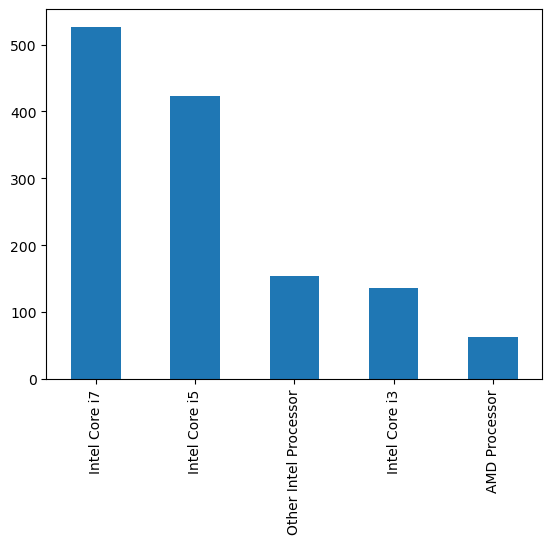

In [47]:
data['Cpu_brand'].value_counts().plot(kind='bar')
plt.show()

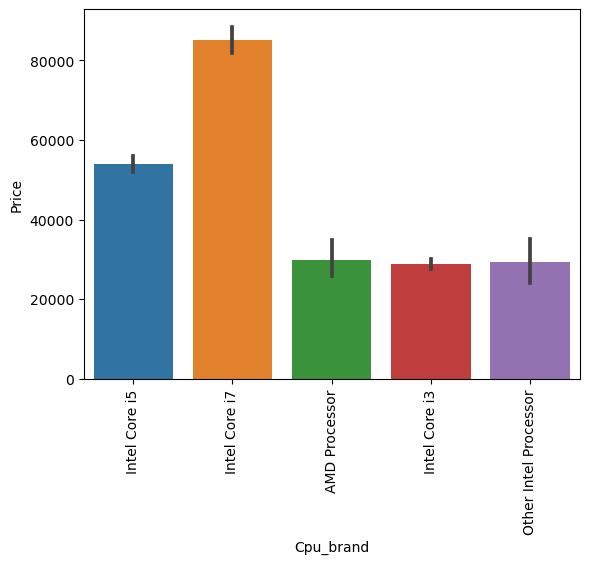

In [48]:
sns.barplot(x=data['Cpu_brand'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [49]:
data.drop(columns=['Cpu','Cpu_name'],inplace=True)

In [50]:
data.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5


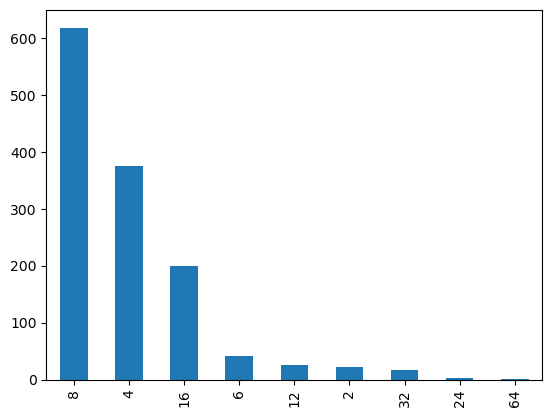

In [51]:
data['Ram'].value_counts().plot(kind='bar')
plt.show()

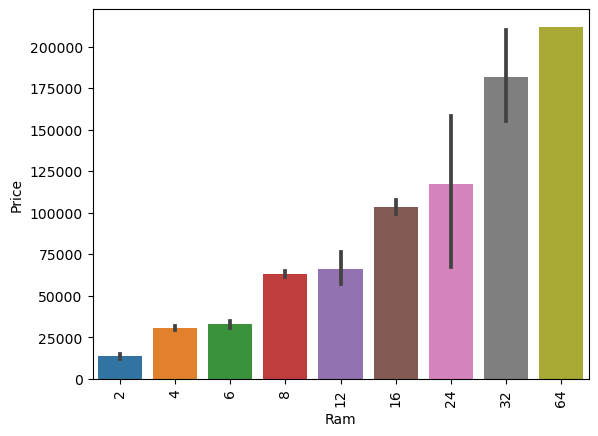

In [52]:
sns.barplot(x=data['Ram'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [53]:
data['Memory'].value_counts()

256GB SSD                       412
1TB HDD                         223
500GB HDD                       132
512GB SSD                       118
128GB SSD + 1TB HDD              94
128GB SSD                        76
256GB SSD + 1TB HDD              73
32GB Flash Storage               38
2TB HDD                          16
64GB Flash Storage               15
512GB SSD + 1TB HDD              14
1TB SSD                          14
256GB SSD + 2TB HDD              10
1.0TB Hybrid                      9
256GB Flash Storage               8
16GB Flash Storage                7
32GB SSD                          6
180GB SSD                         5
128GB Flash Storage               4
512GB SSD + 2TB HDD               3
16GB SSD                          3
512GB Flash Storage               2
1TB SSD + 1TB HDD                 2
256GB SSD + 500GB HDD             2
128GB SSD + 2TB HDD               2
256GB SSD + 256GB SSD             2
512GB SSD + 256GB SSD             1
512GB SSD + 512GB SSD       

In [54]:
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
data["Memory"] = data["Memory"].str.replace('GB', '')
data["Memory"] = data["Memory"].str.replace('TB', '000')
new = data["Memory"].str.split("+", n = 1, expand = True)

data["first"]= new[0]
data["first"]=data["first"].str.strip()

data["second"]= new[1]

data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['first'] = data['first'].str.replace(r'\D', '')

data["second"].fillna("0", inplace = True)

data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['second'] = data['second'].str.replace(r'\D', '')

data["first"] = data["first"].astype(int)
data["second"] = data["second"].astype(int)

data["HDD"]=(data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data["first"]*data["Layer1Flash_Storage"]+data["second"]*data["Layer2Flash_Storage"])

data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [55]:
data.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128


In [56]:
data.drop(columns=['Memory'],inplace=True)

In [57]:
data.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [58]:
data.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [59]:
data['Gpu'].value_counts()

Intel HD Graphics 620             282
Intel HD Graphics 520             185
Intel UHD Graphics 620             68
Nvidia GeForce GTX 1050            66
Nvidia GeForce GTX 1060            48
Nvidia GeForce 940MX               43
AMD Radeon 530                     41
Intel HD Graphics 500              39
Intel HD Graphics 400              37
Nvidia GeForce GTX 1070            30
Intel HD Graphics                  29
Nvidia GeForce GTX 1050 Ti         28
Nvidia GeForce 930MX               25
AMD Radeon R5 M430                 22
Nvidia GeForce 920MX               18
AMD Radeon 520                     17
Nvidia GeForce MX150               15
Intel HD Graphics 515              15
Intel HD Graphics 615              14
AMD Radeon R7 M445                 14
Nvidia GeForce GTX 960M            14
Intel HD Graphics 505              12
AMD Radeon R5                      11
Nvidia GeForce GTX 980M            10
Nvidia Quadro M1200                 9
Intel HD Graphics 405               9
AMD Radeon R

In [60]:
data['Gpu_brand'] = data['Gpu'].apply(lambda x:x.split()[0])

In [61]:
data.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel


In [62]:
data['Gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_brand, dtype: int64

In [63]:
data = data[data['Gpu_brand'] != 'ARM']

In [64]:
data['Gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu_brand, dtype: int64

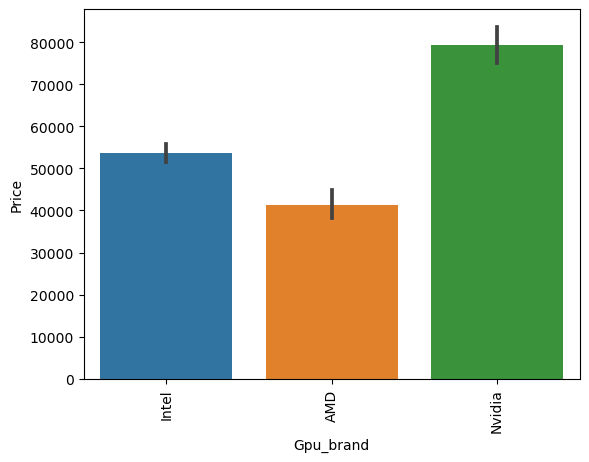

In [65]:
sns.barplot(x=data['Gpu_brand'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [66]:
data.drop(columns=['Gpu'],inplace=True)

In [67]:
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

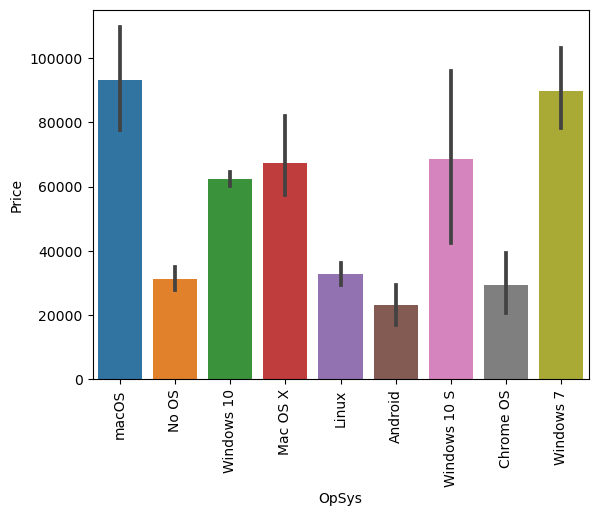

In [68]:
sns.barplot(x=data['OpSys'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [69]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [70]:
data['Os'] = data['OpSys'].apply(cat_os)

In [71]:
data.head(2)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac


In [72]:
data.drop(columns=['OpSys'],inplace=True)

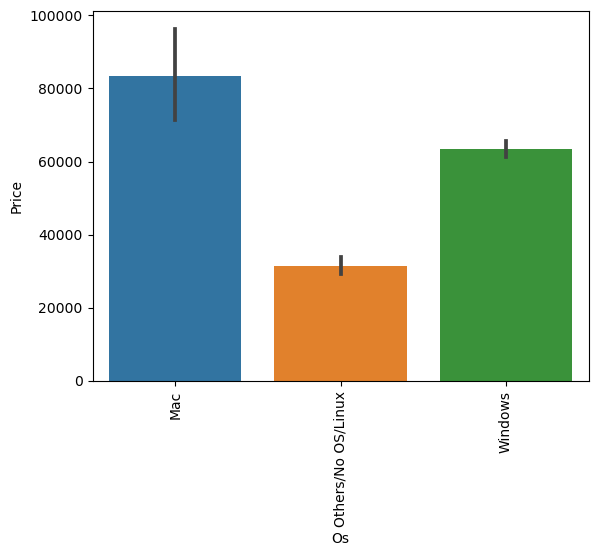

In [73]:
sns.barplot(x=data['Os'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

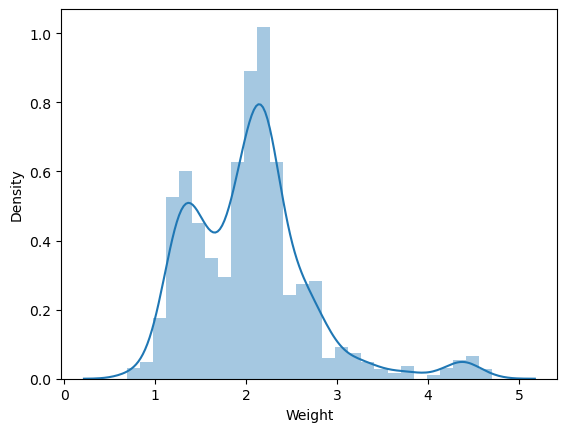

In [74]:
sns.distplot(data['Weight'])
plt.show()

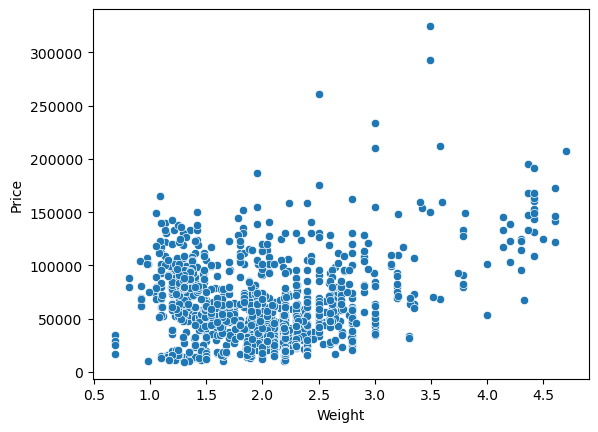

In [75]:
sns.scatterplot(x=data['Weight'],y=data['Price'])
plt.show()

In [76]:
data.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS            0.253320
PPI            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

# Exploratory Data Analysis

## Univariate Analysis --> Explore one column at one time

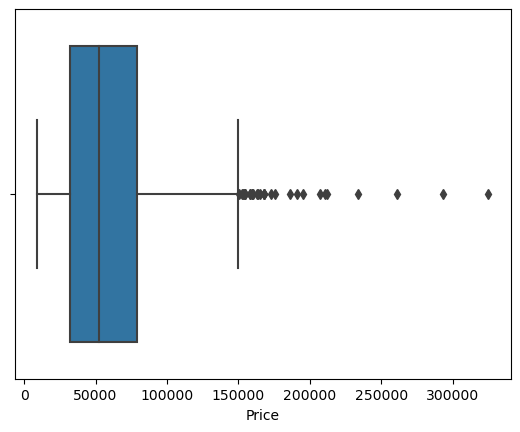

count      1302.000000
mean      59889.058673
std       37251.183866
min        9270.720000
25%       31914.720000
50%       52107.840000
75%       79303.816800
max      324954.720000
Name: Price, dtype: float64

In [77]:
sns.boxplot(data['Price'])
plt.show()
data['Price'].describe()

Skewness:- 1.5197503994318975
Kurtosis:- 4.36718654184981


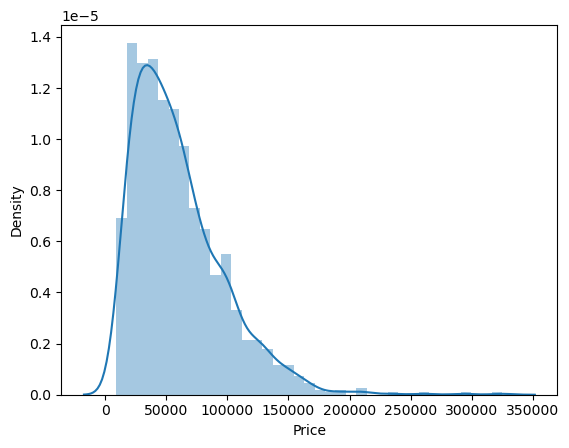

In [78]:
print('Skewness:-',data['Price'].skew())
print('Kurtosis:-',data['Price'].kurt())
sns.distplot(data['Price'])
plt.show()

## Bivariate Analysis  --> Continuous Vs Continuous

In [79]:
data.corr().T

,Ram,Weight,Price,Touchscreen,IPS,PPI,HDD,SSD
Ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.305688,0.095808,0.603379
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.321883,0.514147,-0.063818
Price,0.742905,0.209867,1.000000,0.192917,0.253320,0.475368,-0.096891,0.670660
Touchscreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.458571,-0.208766,0.257577
IPS,0.207949,0.018643,0.253320,0.148026,1.000000,0.299142,-0.093588,0.225311
PPI,0.305688,-0.321883,0.475368,0.458571,0.299142,1.000000,-0.294698,0.509437
HDD,0.095808,0.514147,-0.096891,-0.208766,-0.093588,-0.294698,1.000000,-0.400750
SSD,0.603379,-0.063818,0.670660,0.257577,0.225311,0.509437,-0.400750,1.000000


In [80]:
# Statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ram,1302.0,8.385561,5.085166,2.000000,4.000000,8.000000,8.00000,64.000000
Weight,1302.0,2.039415,0.665274,0.690000,1.500000,2.040000,2.30000,4.700000
Price,1302.0,59889.058673,37251.183866,9270.720000,31914.720000,52107.840000,79303.81680,324954.720000
Touchscreen,1302.0,0.146697,0.353940,0.000000,0.000000,0.000000,0.00000,1.000000
IPS,1302.0,0.279570,0.448960,0.000000,0.000000,0.000000,1.00000,1.000000
PPI,1302.0,146.568253,43.069141,90.583405,127.335678,141.212006,157.35051,352.465149
HDD,1302.0,414.101382,515.889348,0.000000,0.000000,0.000000,1000.00000,2000.000000
SSD,1302.0,183.874040,186.969314,0.000000,0.000000,256.000000,256.00000,1024.000000


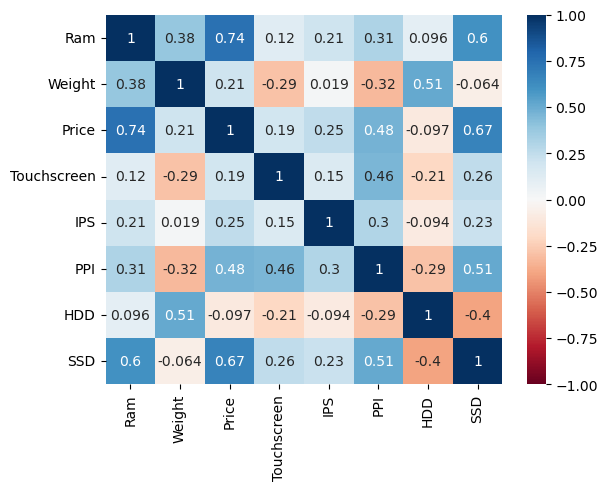

In [81]:
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1,cmap='RdBu')
plt.show()

# Bivariate Analysis --> Categorical Vs Continuous

In [82]:
cate = data.columns[data.dtypes == object]

<Figure size 640x480 with 0 Axes>

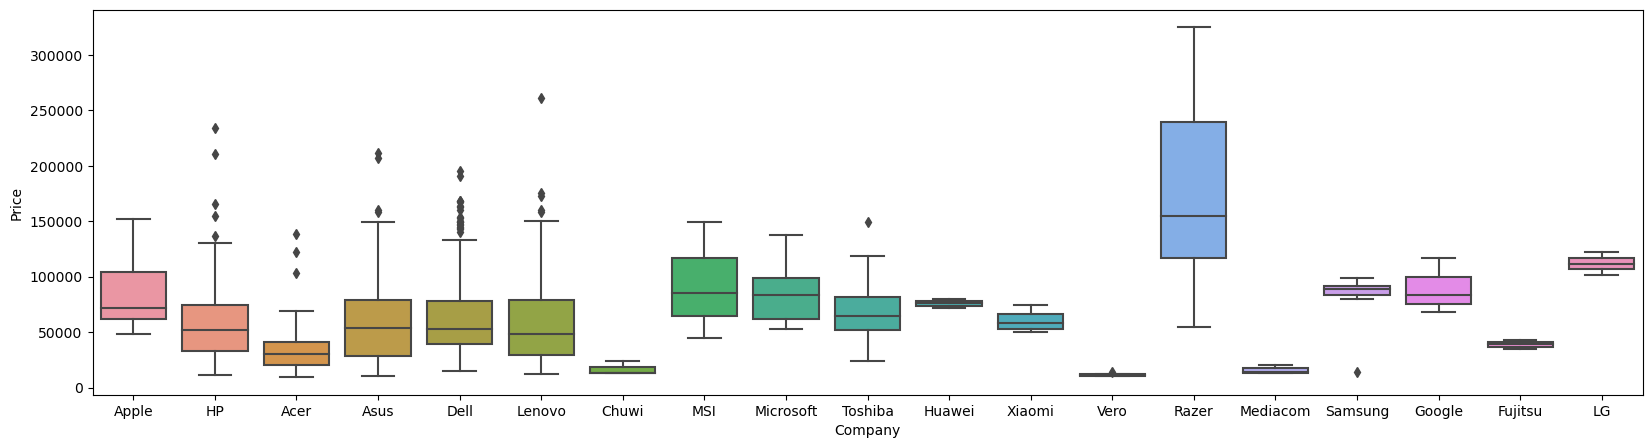

<Figure size 640x480 with 0 Axes>

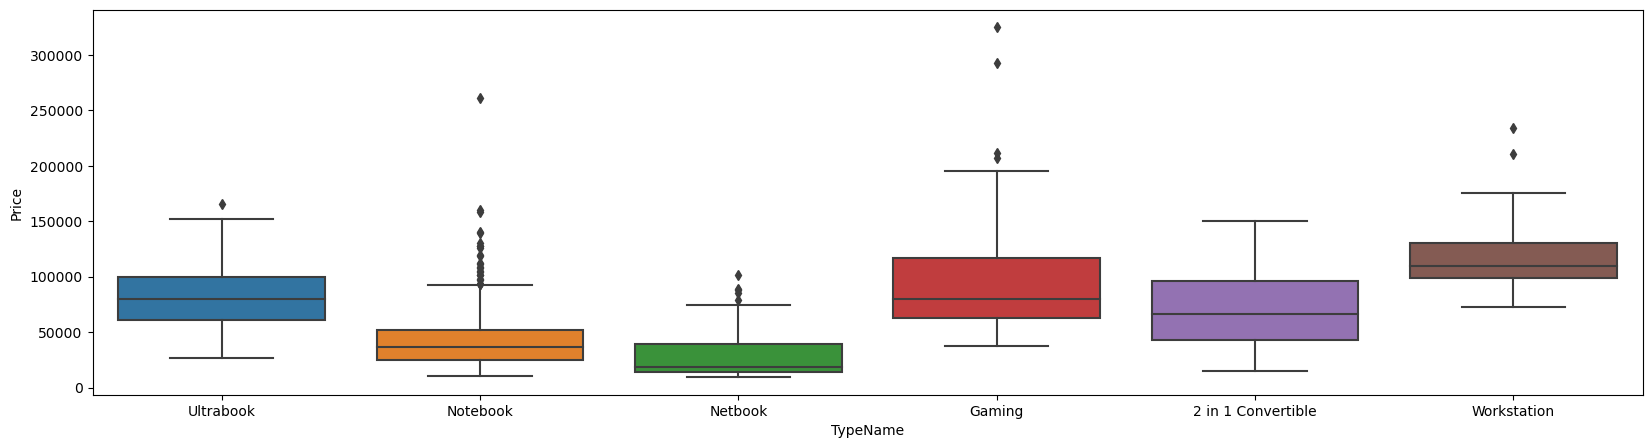

<Figure size 640x480 with 0 Axes>

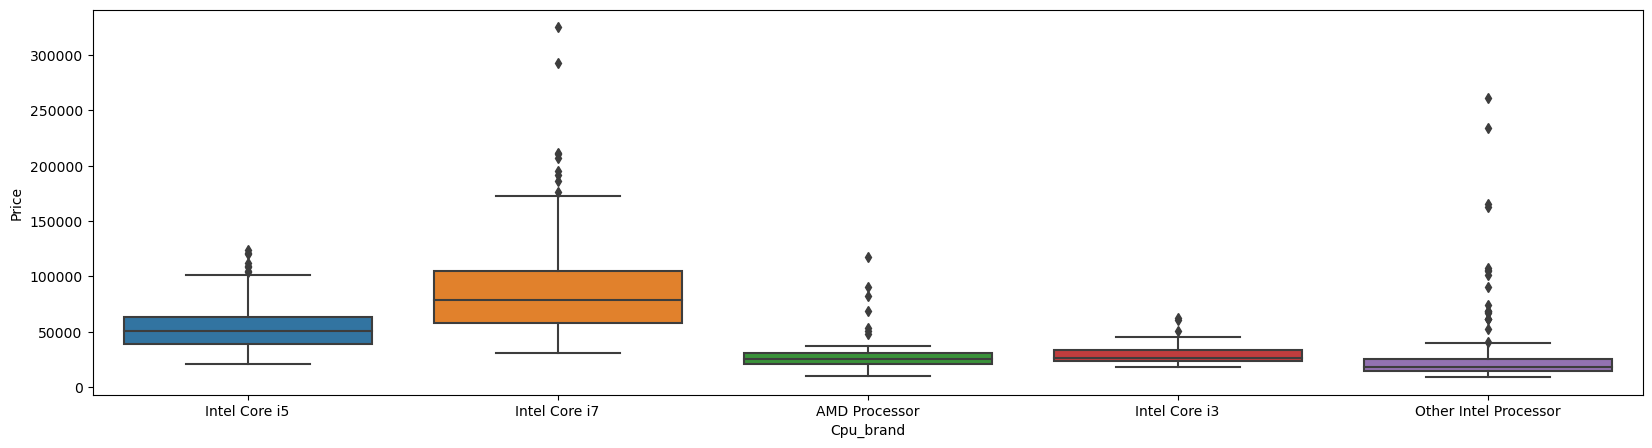

<Figure size 640x480 with 0 Axes>

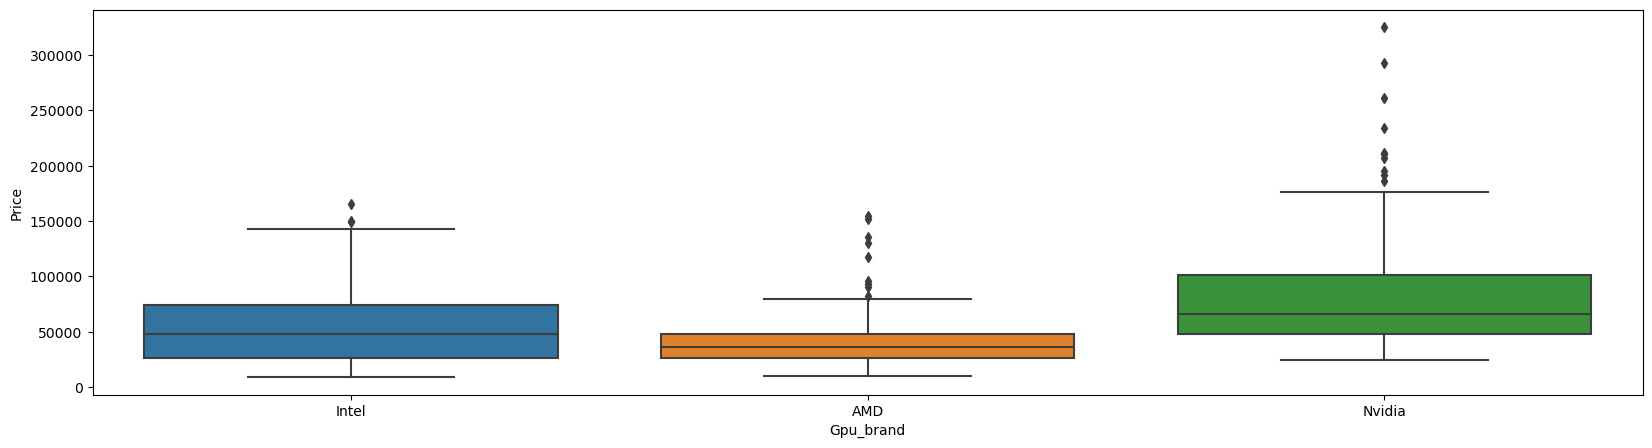

<Figure size 640x480 with 0 Axes>

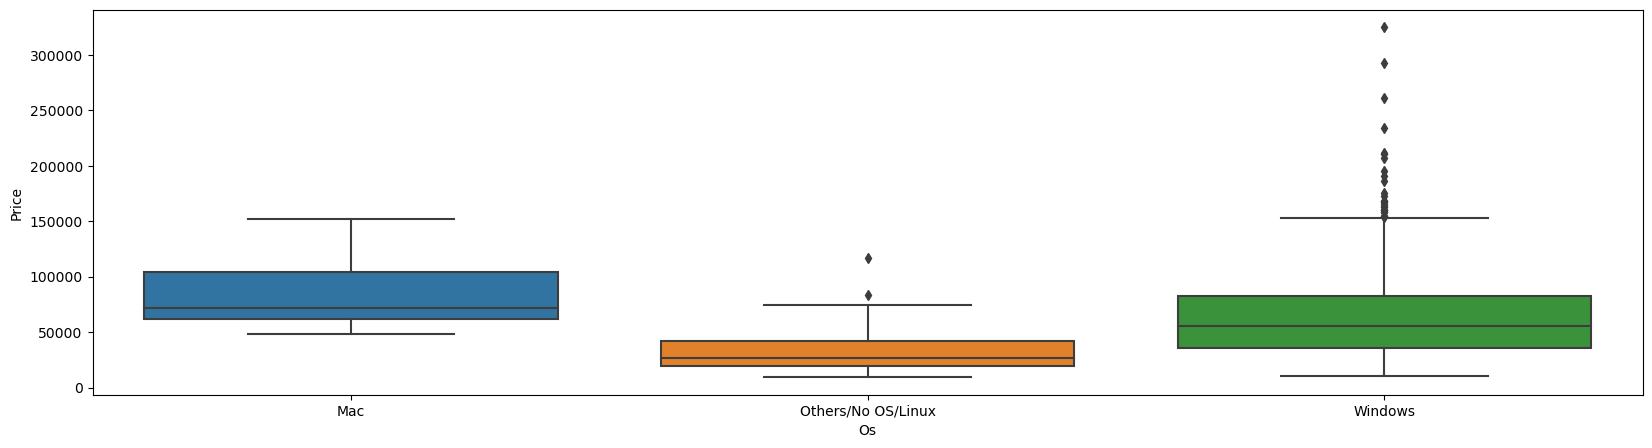

In [83]:
for i in cate:
    figure()
    plt.figure(figsize=(20,5))
    sns.boxplot(data[i],data['Price'])

# Feature Engineering

## Detection and correction outliers

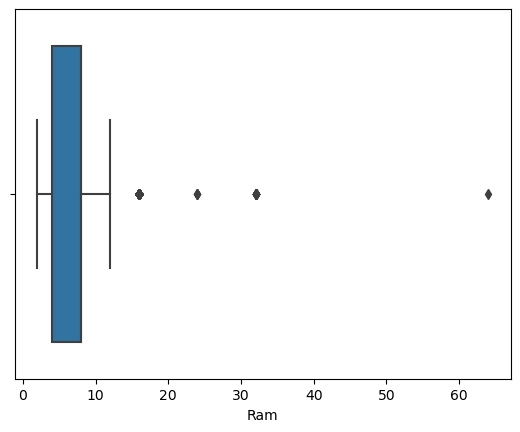

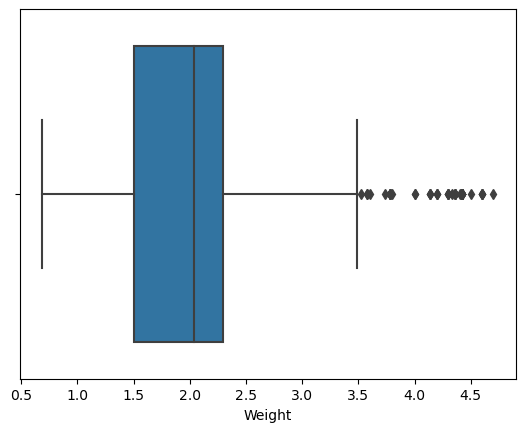

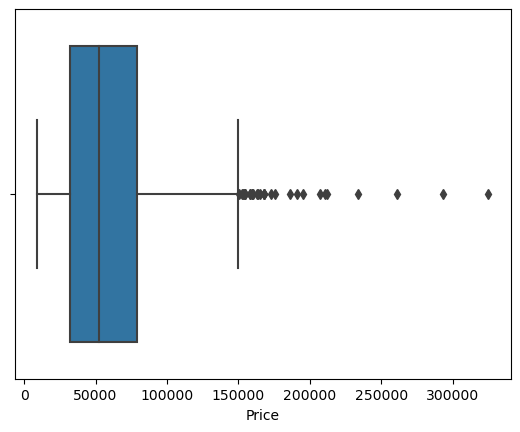

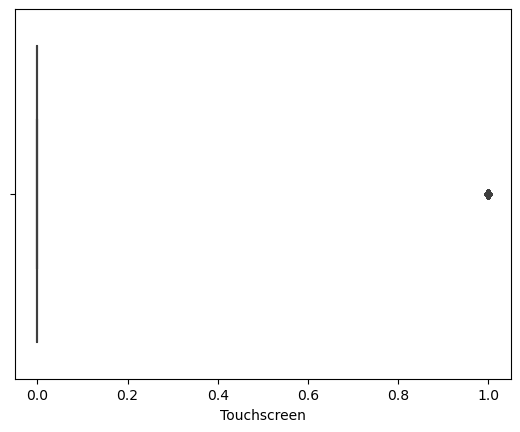

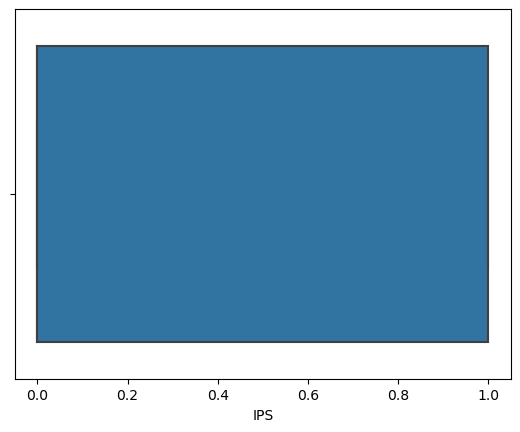

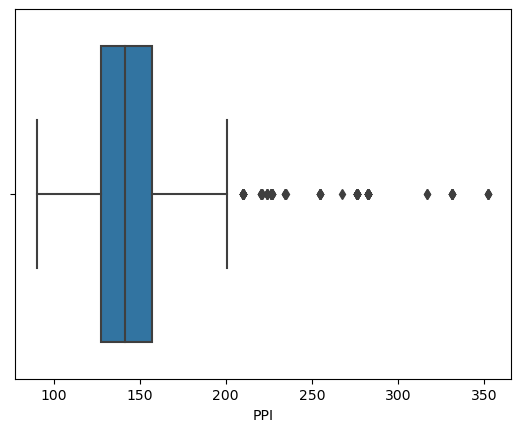

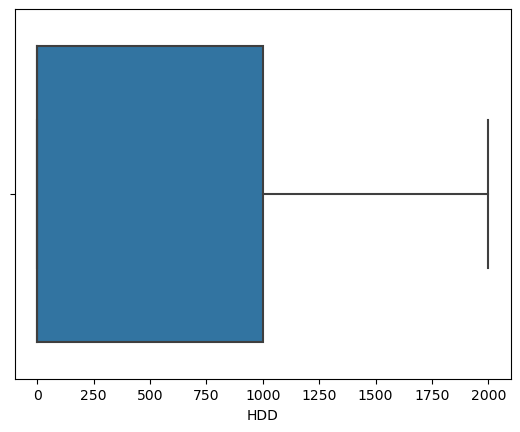

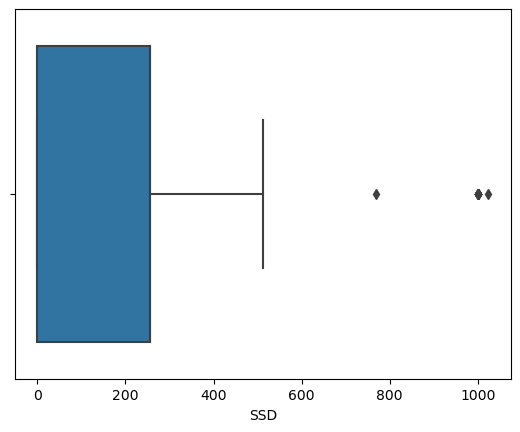

In [84]:
num = data.columns[data.dtypes != object]
for i in num:
    figure()
    sns.boxplot(data[i])

In [85]:
for column in data[['PPI','SSD','Price','Weight','Ram']]:
    print(column)
    Q3 = np.percentile(data[column],75)
    Q1 = np.percentile(data[column],25)
    IQR = Q3-Q1
    upper_Bound = Q3+(1.5*IQR)
    lower_Bound = Q1-(1.5*IQR)
    data[column] = np.where(
        data[column]>upper_Bound,
        upper_Bound,data[column])
    data[column] = np.where(
        data[column]<lower_Bound,
        lower_Bound,data[column]

    )

PPI
SSD
Price
Weight
Ram


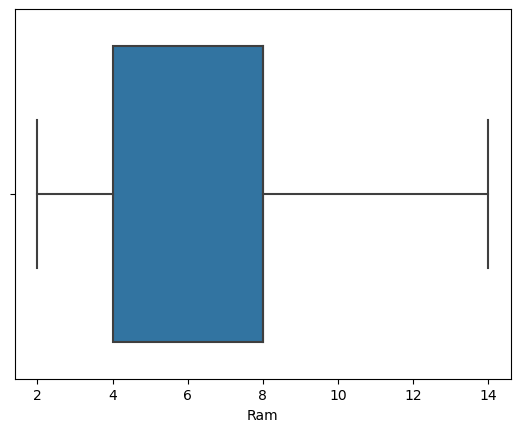

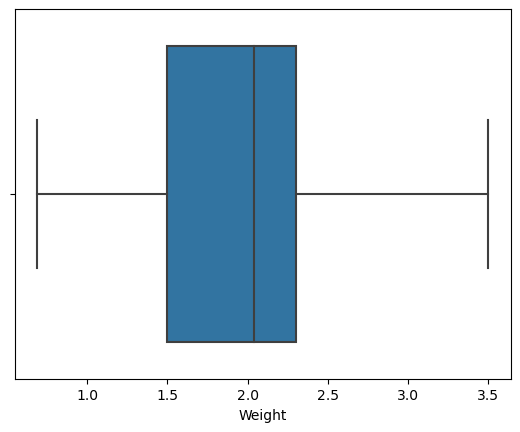

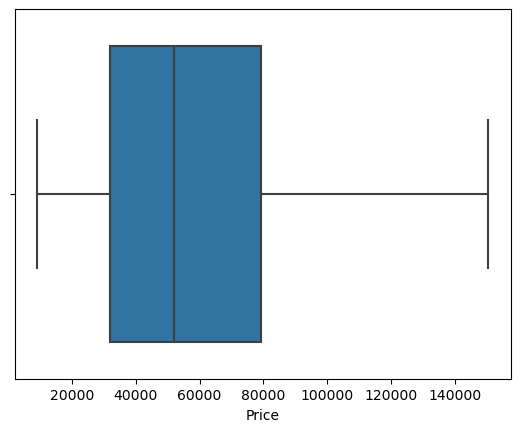

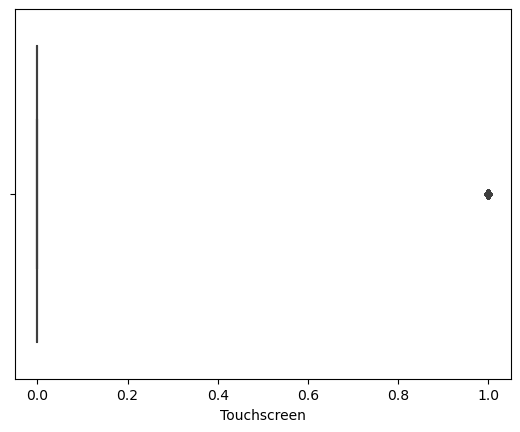

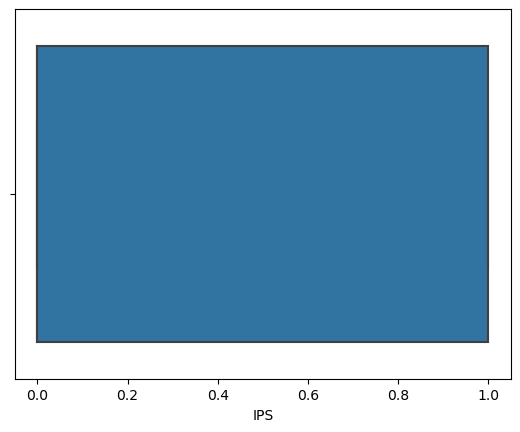

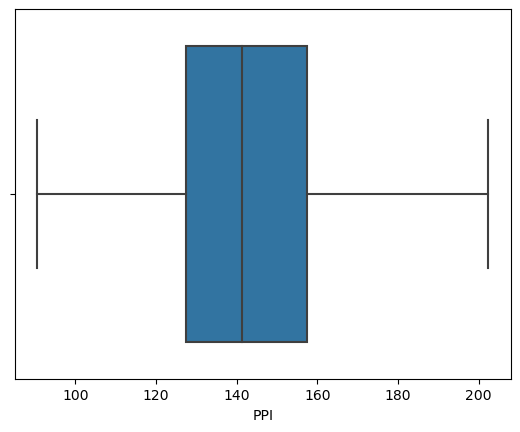

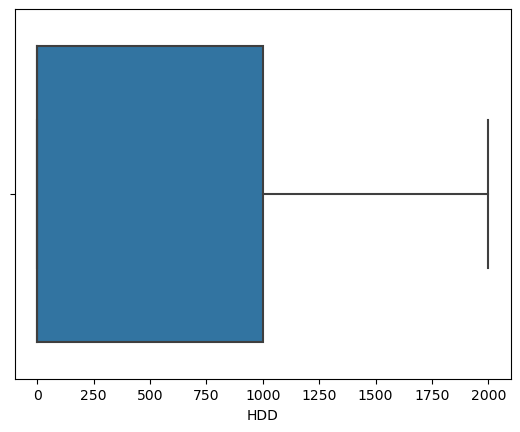

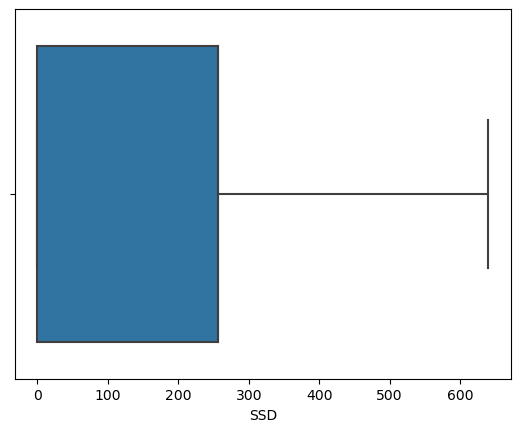

In [86]:
num = data.columns[data.dtypes != object]
for i in num:
    figure()
    sns.boxplot(data[i])

In [87]:
# One hot Encoding
data_Q = data.copy()
data_1 = pd.get_dummies(data_Q,drop_first=True)

In [88]:
data_1.head(2)

,Ram,Weight,Price,Touchscreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia,Os_Others/No OS/Linux,Os_Windows
0,8.0,1.37,71378.6832,0,1,202.372757,0,128.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1,8.0,1.34,47895.5232,0,0,127.677940,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0


# Check multicollinearty Using VIF

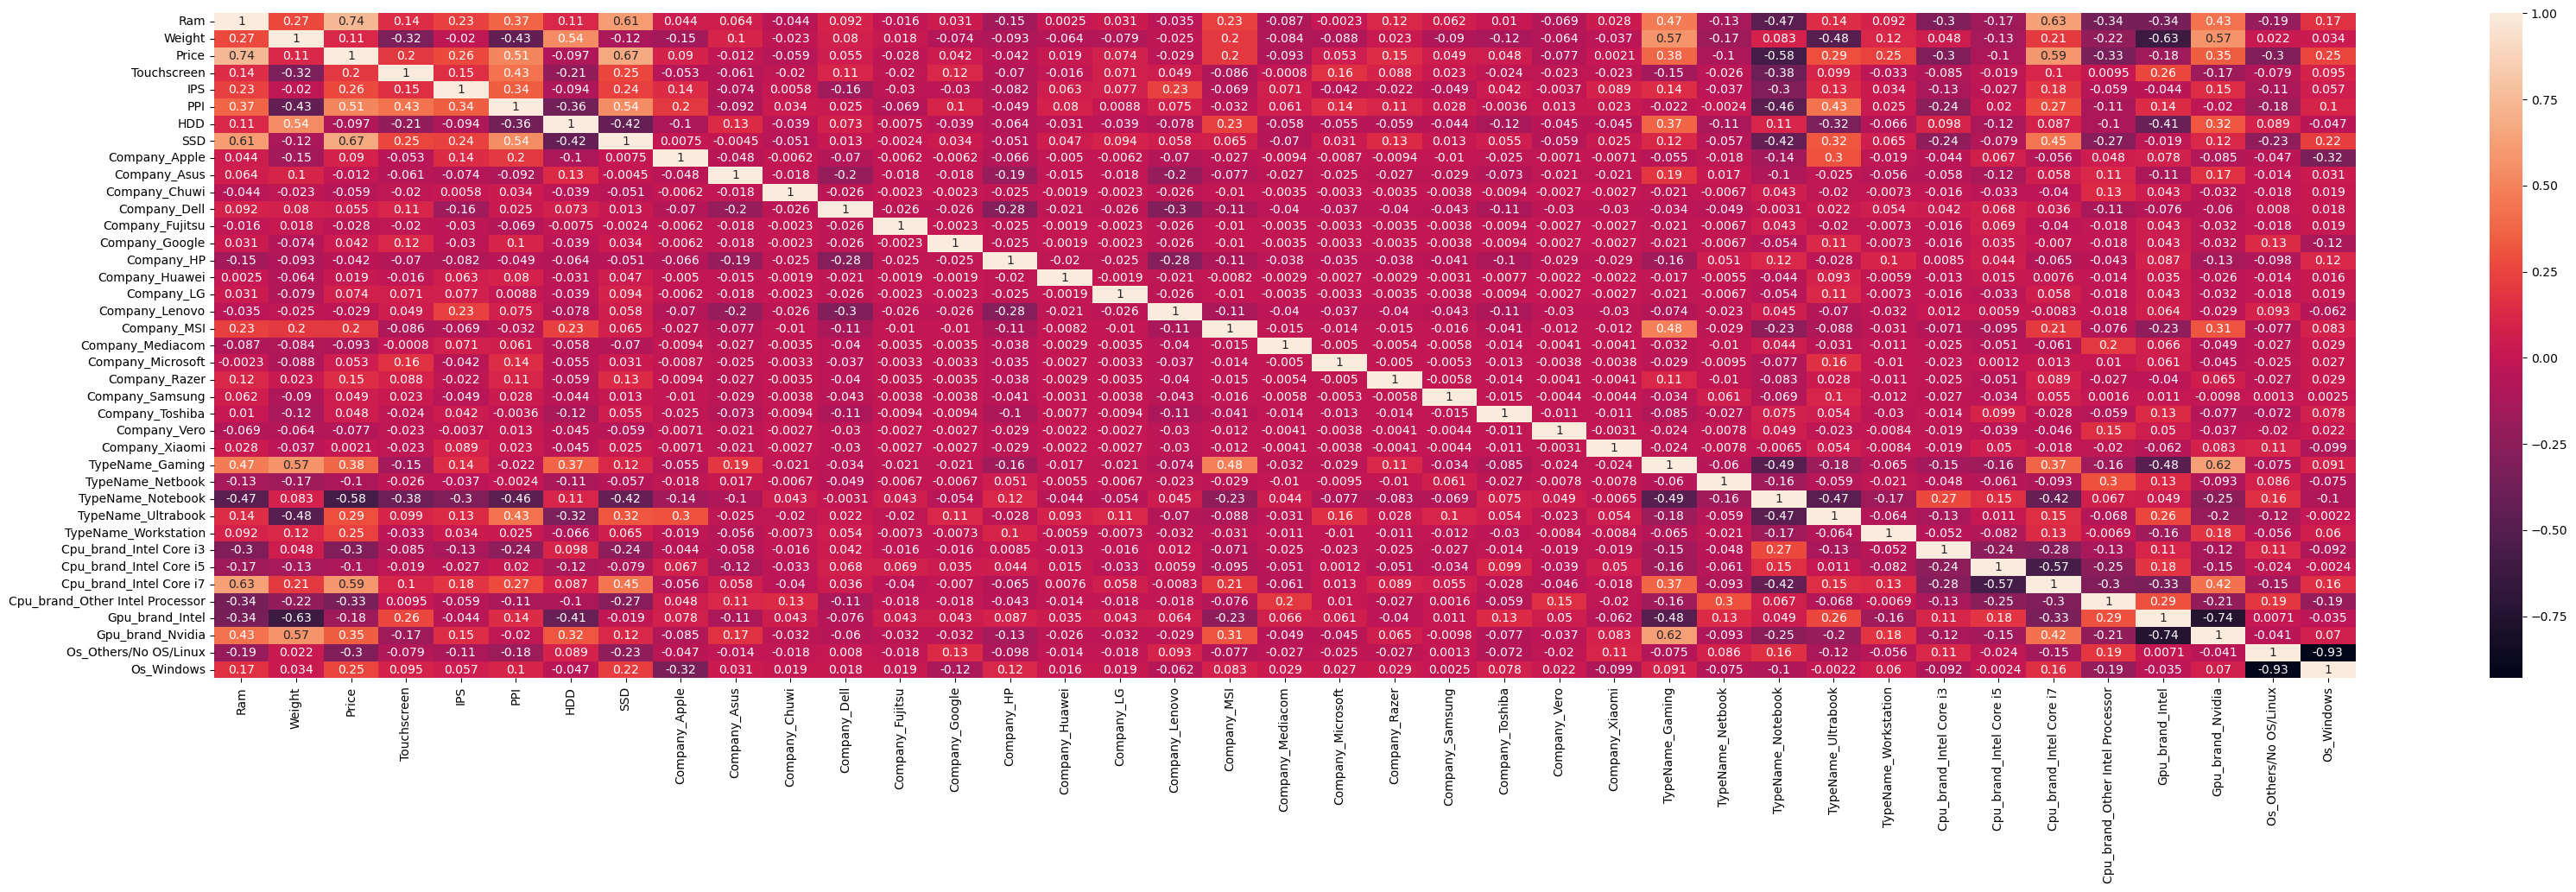

In [89]:
plt.figure(figsize=(40,10))
sns.heatmap(data_1.corr(),annot=True)
plt.show()

In [90]:
VIF = pd.DataFrame()
VIF['VIF'] = [variance_inflation_factor(data_1.values,i) for i in range(data_1.shape[1])]
VIF['Feature'] = data_1.columns

In [91]:
VIF

,VIF,Feature
0,3.592381,Ram
1,4.012412,Weight
2,4.218320,Price
3,3.326886,Touchscreen
4,1.483824,IPS
5,2.847622,PPI
6,2.286159,HDD
7,3.379320,SSD
8,4.423600,Company_Apple
9,2.514004,Company_Asus


In [92]:
# Drop all Multicollinearty columns
data_1.drop(columns=['Os_Windows','Os_Others/No OS/Linux','Cpu_brand_Intel Core i7','TypeName_Notebook','TypeName_Gaming'],inplace=True)

In [93]:
data_1.shape

(1302, 34)

In [94]:
data_1.head(2)

,Ram,Weight,Price,Touchscreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Netbook,TypeName_Ultrabook,TypeName_Workstation,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia
0,8.0,1.37,71378.6832,0,1,202.372757,0,128.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
1,8.0,1.34,47895.5232,0,0,127.677940,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [95]:
# Data sperate into X and y
X = data_1.drop(columns=['Price'])
y = data_1['Price']

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [97]:
X_train.head(2)

,Ram,Weight,Touchscreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Netbook,TypeName_Ultrabook,TypeName_Workstation,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia
183,8.0,2.0,0,0,100.454666,0,128.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1141,8.0,2.4,0,0,141.212006,1000,128.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [98]:
y.head(2)

0    71378.6832
1    47895.5232
Name: Price, dtype: float64

# LinearRegression model

In [99]:
def model_pred_Eval(*args):
    """
     This function only used for Linear_Regression_model
    """
    Lr = LinearRegression()
    Lr.fit(X_train,y_train)
    y_pred = Lr.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    print('Accuracy of LinearModel r2_score:-%.4f%%'%r2)
    k = data_1.shape[1]
    n = data.shape[0]
    adjusted_r2 = 1-((1-r2)*(n-1)/(n-k-1))
    print('Adjusted adjusted_r2_score:-%.4f%%:-'%adjusted_r2)
    print('MSE:-',mean_squared_error(y_test,y_pred))
    print('RMSE:-',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('MAPE:-',mean_absolute_percentage_error(y_test,y_pred))

In [100]:
model_pred_Eval(data_1,X_train,X_test,y_train)

Accuracy of LinearModel r2_score:-0.6828%
Adjusted adjusted_r2_score:-0.6743%:-
MSE:- 331960683.81739736
RMSE:- 18219.788248423672
MAPE:- 0.26237747733340844


# RandomForest model

In [101]:
def random_forest_model_eval(*args):
    """
     This function only used for RandomForest_model
    """
    Rm = RandomForestRegressor()
    Rm.fit(X_train,y_train)
    y_pred1 = Rm.predict(X_test)
    r2 = r2_score(y_test,y_pred1)
    print('Accuracy of Randomforest_model r2_score:-%.4f%%'%r2)
    k = data_1.shape[1]
    n = data_1.shape[0]
    adjusted_r2 = 1-((1-r2)*(n-1)/(n-k-1))
    print('Adjusted adjusted_r2_score:-%.4f%%:-'%adjusted_r2)
    print('MSE:-',mean_squared_error(y_test,y_pred1))
    print('RMSE:-',np.sqrt(mean_squared_error(y_test,y_pred1)))
    print('MAPE:-',mean_absolute_percentage_error(y_test,y_pred1))

In [102]:
random_forest_model_eval(data_1,X_train,X_test,y_train)

Accuracy of Randomforest_model r2_score:-0.8187%
Adjusted adjusted_r2_score:-0.8139%:-
MSE:- 189709438.9460467
RMSE:- 13773.504962283447
MAPE:- 0.17456328380546884


# Assumption of LinearRegression

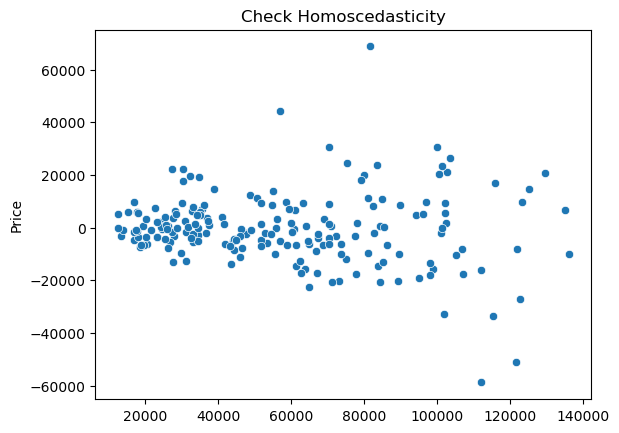

In [103]:
# Residual of the model
Rm = RandomForestRegressor()
Rm.fit(X_train,y_train)
y_pred1 = Rm.predict(X_test)
residual = y_test-y_pred1
sns.scatterplot(y_pred1,residual)
plt.title('Check Homoscedasticity')
plt.show()

Error should be show normal Distribution


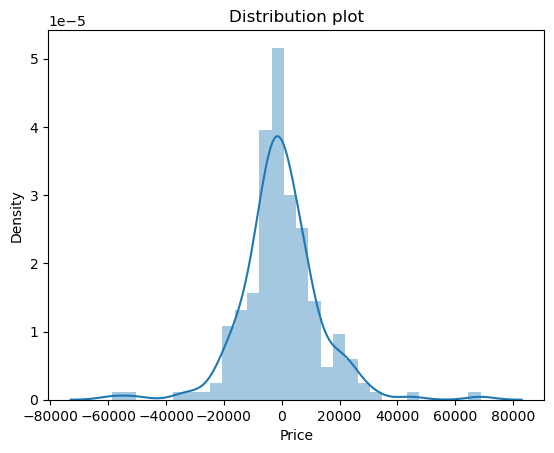

In [104]:
print('Error should be show normal Distribution')
sns.distplot(residual)
plt.title('Distribution plot')
plt.show()

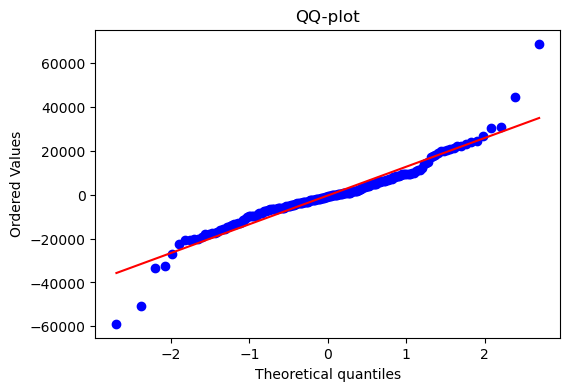

In [105]:
fig,ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual,plot=ax,fit=True)
plt.title('QQ-plot')
plt.show()

# Hyparparameter Tunning

In [106]:
n_estimators = [10, 100, 1000,1600]
max_features = ['sqrt', 'log2']
max_depth = [10,20,30,40,50,60,70]
min_samples_split = [2,5,100]
grid = dict(n_estimators=n_estimators,max_features=max_features,max_depth = max_depth,min_samples_split = min_samples_split)


RF = RandomForestRegressor()
RF.fit(X_train,y_train)
grid_search = GridSearchCV(estimator=RF, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
grid_result.best_score_

0.0

# SVM model

In [107]:
def SVM_model_eval(*args):
    """
     This function only used for Ridge_model
    """
    Sc = StandardScaler()
    tr_std = Sc.fit(X_train)
    train_std = tr_std.transform(X_train)
    test_std  = tr_std.transform(X_test)
    
    trainX_std = pd.DataFrame(train_std,columns=X_train.columns)
    testX_std  = pd.DataFrame(test_std,columns=X_test.columns)
    
    svr = SVR()
    svr.fit(trainX_std,y_train)
    y_pred3 = svr.predict(testX_std)
    r2 = r2_score(y_test,y_pred3)
    print('Accuracy of  SVM_model r2_score:-%.4f%%'%r2)
    k = data_1.shape[1]
    n = data_1.shape[0]
    adjusted_r2 = 1-((1-r2)*(n-1)/(n-k-1))
    print('Adjusted adjusted_r2_score:-%.4f%%:-'%adjusted_r2)
    print('MSE:-',mean_squared_error(y_test,y_pred3))
    print('RMSE:-',np.sqrt(mean_squared_error(y_test,y_pred3)))
    print('MAPE:-',mean_absolute_percentage_error(y_test,y_pred3))

In [108]:
SVM_model_eval(data_1,X_train,X_test,y_train,y_test)

Accuracy of  SVM_model r2_score:--0.0216%
Adjusted adjusted_r2_score:--0.0490%:-
MSE:- 1069067079.6135784
RMSE:- 32696.591253731305
MAPE:- 0.6420513782987934


# Knn model

In [109]:
def Knn_model_eval(*args):
    """
     This function only used for Knn model
    """
    Sc = StandardScaler()
    tr_std = Sc.fit(X_train)
    train_std = tr_std.transform(X_train)
    test_std  = tr_std.transform(X_test)
    
    trainX_std = pd.DataFrame(train_std,columns=X_train.columns)
    testX_std  = pd.DataFrame(test_std,columns=X_test.columns)
    
    knn = KNeighborsRegressor()
    knn.fit(trainX_std,y_train)
    y_pred4 = knn.predict(testX_std)
    r2 = r2_score(y_test,y_pred4)
    print('Accuracy of  KNN_model r2_score:-%.4f%%'%r2)
    k = data_1.shape[1]
    n = data_1.shape[0]
    adjusted_r2 = 1-((1-r2)*(n-1)/(n-k-1))
    print('Adjusted adjusted_r2_score:-%.4f%%:-'%adjusted_r2)
    print('MSE:-',mean_squared_error(y_test,y_pred4))
    print('RMSE:-',np.sqrt(mean_squared_error(y_test,y_pred4)))
    print('MAPE:-',mean_absolute_percentage_error(y_test,y_pred4))

In [110]:
Knn_model_eval(data_1,X_train,X_test,y_train,y_test)

Accuracy of  KNN_model r2_score:-0.7175%
Adjusted adjusted_r2_score:-0.7099%:-
MSE:- 295641280.39577204
RMSE:- 17194.222296916254
MAPE:- 0.20911275389971218


# Decission Tree model

In [111]:
def Decission_Tree_model_eval(*args):
    """
     This function only used for Decission_Tree_model
    """
    DC = DecisionTreeRegressor()
    DC.fit(X_train,y_train)
    y_pred_1 = DC.predict(X_test)
    r2 = r2_score(y_test,y_pred_1)
    print('Accuracy of Decission_Tree_model r2_score:-%.4f%%'%r2)
    k = data_1.shape[1]
    n = data_1.shape[0]
    adjusted_r2 = 1-((1-r2)*(n-1)/(n-k-1))
    print('Adjusted adjusted_r2_score:-%.4f%%:-'%adjusted_r2)
    print('MSE:-',mean_squared_error(y_test,y_pred_1))
    print('RMSE:-',np.sqrt(mean_squared_error(y_test,y_pred_1)))
    print('MAPE:-',mean_absolute_percentage_error(y_test,y_pred_1))

In [112]:
Decission_Tree_model_eval(data_1,X_train,X_test,y_train,y_test)

Accuracy of Decission_Tree_model r2_score:-0.7302%
Adjusted adjusted_r2_score:-0.7229%:-
MSE:- 282370264.2628833
RMSE:- 16803.87646535416
MAPE:- 0.20309556094645928


# Ridge Regression model

In [113]:
def Ridge_model_eval(*args):
    """
     This function only used for Ridge_model
    """
    RD = Ridge()
    RD.fit(X_train,y_train)
    y_pred2 = RD.predict(X_test)
    r2 = r2_score(y_test,y_pred2)
    print('Accuracy of  Ridge_model r2_score:-%.4f%%'%r2)
    k = data_1.shape[1]
    n = data_1.shape[0]
    adjusted_r2 = 1-((1-r2)*(n-1)/(n-k-1))
    print('Adjusted adjusted_r2_score:-%.4f%%:-'%adjusted_r2)
    print('MSE:-',mean_squared_error(y_test,y_pred2))
    print('RMSE:-',np.sqrt(mean_squared_error(y_test,y_pred2)))
    print('MAPE:-',mean_absolute_percentage_error(y_test,y_pred2))

In [114]:
Ridge_model_eval(data_1,X_train,X_test,y_train)

Accuracy of  Ridge_model r2_score:-0.6866%
Adjusted adjusted_r2_score:-0.6782%:-
MSE:- 327991495.5753285
RMSE:- 18110.53548560419
MAPE:- 0.26088225448189417


# AdaBoostRegressor Model

In [115]:
def AdaBoostRegressor_model_eval(*args):
    """
     This function only used for AdaBoostRegressor_model
    """
    Ad = AdaBoostRegressor()
    Ad.fit(X_train,y_train)
    y_pred_2 = Ad.predict(X_test)
    r2 = r2_score(y_test,y_pred_2)
    print('Accuracy of Decission_Tree_model r2_score:-%.4f%%'%r2)
    k = data_1.shape[1]
    n = data_1.shape[0]
    adjusted_r2 = 1-((1-r2)*(n-1)/(n-k-1))
    print('Adjusted adjusted_r2_score:-%.4f%%:-'%adjusted_r2)
    print('MSE:-',mean_squared_error(y_test,y_pred_2))
    print('RMSE:-',np.sqrt(mean_squared_error(y_test,y_pred_2)))
    print('MAPE:-',mean_absolute_percentage_error(y_test,y_pred_2))

In [116]:
AdaBoostRegressor_model_eval(data_1,X_train,y_train,X_test,y_test)

Accuracy of Decission_Tree_model r2_score:-0.6727%
Adjusted adjusted_r2_score:-0.6639%:-
MSE:- 342499099.7270521
RMSE:- 18506.731200486272
MAPE:- 0.3438131634050964


# Gradient Boost model

In [117]:
def GradientBoostingRegressor_model_eval(*args):
    """
     This function only used for GradientBoostingRegressor_model
    """
    Gr = GradientBoostingRegressor()
    Gr.fit(X_train,y_train)
    y_pred_3 = Gr.predict(X_test)
    r2 = r2_score(y_test,y_pred_3)
    print('Accuracy of GradientBoostingRegressor_model r2_score:-%.4f%%'%r2)
    k = data_1.shape[1]
    n = data_1.shape[0]
    adjusted_r2 = 1-((1-r2)*(n-1)/(n-k-1))
    print('Adjusted adjusted_r2_score:-%.4f%%:-'%adjusted_r2)
    print('MSE:-',mean_squared_error(y_test,y_pred_3))
    print('RMSE:-',np.sqrt(mean_squared_error(y_test,y_pred_3)))
    print('MAPE:-',mean_absolute_percentage_error(y_test,y_pred_3))

In [118]:
GradientBoostingRegressor_model_eval(data_1,X_train,X_test,y_train,y_test)

Accuracy of GradientBoostingRegressor_model r2_score:-0.7940%
Adjusted adjusted_r2_score:-0.7885%:-
MSE:- 215572591.6287477
RMSE:- 14682.390528410137
MAPE:- 0.1965319010405165


# XGBRegressor Model

In [119]:
def XGBRegressor_model_eval(*args):
    """
     This function only used for XGBRegressor_model
    """
    XG = XGBRegressor()
    XG.fit(X_train,y_train)
    y_pred_4 = XG.predict(X_test)
    r2 = r2_score(y_test,y_pred_4)
    print('Accuracy of XGBRegressor_model r2_score:-%.4f%%'%r2)
    k = data_1.shape[1]
    n = data_1.shape[0]
    adjusted_r2 = 1-((1-r2)*(n-1)/(n-k-1))
    print('Adjusted adjusted_r2_score:-%.4f%%:-'%adjusted_r2)
    print('MSE:-',mean_squared_error(y_test,y_pred_4))
    print('RMSE:-',np.sqrt(mean_squared_error(y_test,y_pred_4)))
    print('MAPE:-',mean_absolute_percentage_error(y_test,y_pred_4))

In [120]:
XGBRegressor_model_eval(data_1,X_train,X_test,y_train,y_test)

Accuracy of XGBRegressor_model r2_score:-0.7843%
Adjusted adjusted_r2_score:-0.7785%:-
MSE:- 225762797.45459217
RMSE:- 15025.4050679039
MAPE:- 0.17137043439836905


# All model 

In [121]:
SVR = SVR(kernel='sigmoid', gamma=1.0)
KNN = KNeighborsRegressor()
DT = DecisionTreeRegressor(max_depth=5)
RF = RandomForestRegressor(n_estimators=50, random_state=2)
AD = AdaBoostRegressor(n_estimators=50, random_state=2)
XG = XGBRegressor(n_estimators=50,random_state=2)
GBR = GradientBoostingRegressor(n_estimators=50,random_state=2)

In [122]:
clfs = {
    'SVC Model' : SVR,
    'KNN Model' : KNN, 
    'DT Model': DT,  
    'RF Model': RF, 
    'AD Model': AD, 
    'XG Model': XG, 
    'GBR Model':GBR
}

In [123]:
def Train_Regression(*args):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    k = data_1.shape[1]
    n = data_1.shape[0]
    r2 = r2_score(y_test,y_pred)
    adjusted_r2 = 1-((1-r2)*(n-1)/(n-k-1))
    MSE = mean_squared_error(y_test,y_pred)
    RMSE = (mean_squared_error(y_test,y_pred)**0.5)
    MAPE = mean_absolute_percentage_error(y_test,y_pred)
    return r2,adjusted_r2,MSE,RMSE,MAPE

In [124]:
R2_Score_S = []
MSE = []
RMSE = []
MAPE = []
ad = []
for name,clf in clfs.items():
    R2_Score,adjusted_r2,MSE_Score,RMSE_Score,MAPE_Score = Train_Regression(clf,data_1,X_train,X_test,y_train,y_test)
    #print("For ",name)
    #print("Accuracy - ",R2_Score)
    #print("Adjusted_r2_score - ",adjusted_r2)
    #print('MSE:-',MSE_Score)
    #print('RMSE',RMSE_Score)
    #print('MAPE',MAPE_Score)
    R2_Score_S.append(R2_Score)
    MSE.append(MSE_Score)
    RMSE.append(RMSE_Score)
    MAPE.append(MAPE_Score)
    ad.append(adjusted_r2)

# All model performance

In [125]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'R2_Score':R2_Score_S,'adjusted_R2_Score':ad,'MSE_score':MSE,'RMSE_score':RMSE,'MAPE_score':MAPE})
performance_df

,Algorithm,R2_Score,adjusted_R2_Score,MSE_score,RMSE_score,MAPE_score
0,SVC Model,-0.023625,-0.051094,1.071219e+09,32729.482938,0.643007
1,KNN Model,0.720507,0.713007,2.924883e+08,17102.289685,0.223537
2,DT Model,0.721342,0.713864,2.916142e+08,17076.714363,0.245090
3,RF Model,0.825534,0.820852,1.825781e+08,13512.145785,0.175008
4,AD Model,0.683038,0.674533,3.316992e+08,18212.609729,0.370942
5,XG Model,0.799338,0.793953,2.099917e+08,14491.090831,0.172693
6,GBR Model,0.775834,0.769819,2.345887e+08,15316.289592,0.217154


In [126]:
# Hyparaparameter Tunning 

In [127]:
# Using Deferent type model

In [128]:
print('_______________________Welcome_____________________')

_______________________Welcome_____________________


In [129]:
data.head(2)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8.0,1.37,71378.6832,0,1,202.372757,Intel Core i5,0,128.0,Intel,Mac
1,Apple,Ultrabook,8.0,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0.0,Intel,Mac


In [130]:
# Data seprate into two parts
X = data.drop(columns=['Price'])
y = data['Price']

In [131]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123,test_size=0.15)

# LinearRegression Model

In [133]:
def Linear_model(*args):
    step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
    ],remainder='passthrough')

    step2 = LinearRegression()

    pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
    ])

    pipe.fit(X_train,y_train)

    y_pred = pipe.predict(X_test)

    print('R2 score:-',r2_score(y_test,y_pred))
    print('MAE:-',mean_absolute_error(y_test,y_pred))
    print('MSE:-',mean_squared_error(y_test,y_pred))
    print('RMSE:-',(mean_squared_error(y_test,y_pred)**0.5))
    print('MAPE:-',mean_absolute_percentage_error(y_test,y_pred))



# Ridge Regression model

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

# Lasso Regression model

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

# Knn model

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

# Decision Tree Model

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

# SVM model

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

# RandomForest Model

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

# ExtraTrees Model

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

# AdaBoost Model

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

# Gradient Boost model

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

# XgBoost model

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

# Voting Regressor model

In [ ]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

# Stacking

In [ ]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

# Exporting the Model

In [ ]:
import pickle

pickle.dump(data,open('C:\\Users\\DELL\\OneDrive\\Desktop\\Download\\df.pkl','wb'))
pickle.dump(pipe,open('C:\\Users\\DELL\\OneDrive\\Desktop\\Download\\pipeline.pkl','wb'))

In [ ]:
data